In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
%run 'req_analysis/neptune-util.py'
%env NEPTUNE_CLUSTER_ENDPOINT=ec2-18-224-170-154.us-east-2.compute.amazonaws.com
%env NEPTUNE_CLUSTER_PORT=8182
g = neptune.graphTraversal()

env: NEPTUNE_CLUSTER_ENDPOINT=ec2-18-224-170-154.us-east-2.compute.amazonaws.com
env: NEPTUNE_CLUSTER_PORT=8182
gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


In [126]:
import random

In [127]:
import scipy
import scipy.spatial.distance as ssd

In [128]:
from paris import paris
from paris.utils import *

In [129]:
import matplotlib.pyplot as plt
import networkx as nx

In [130]:
import time

from req_analysis import Requirement

In [131]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:3001/sparql")

In [132]:
queryString = """prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix xml: <http://www.w3.org/XML/1998/namespace/>
prefix mms-ontology: <https://opencae.jpl.nasa.gov/mms/rdf/ontology/>
prefix mms-graph: <https://opencae.jpl.nasa.gov/mms/rdf/graph/>
prefix mms-property: <https://opencae.jpl.nasa.gov/mms/rdf/property/>
prefix mms-class: <https://opencae.jpl.nasa.gov/mms/rdf/class/>
prefix mms-element: <https://opencae.jpl.nasa.gov/mms/rdf/element/>
prefix mms-artifact: <https://opencae.jpl.nasa.gov/mms/rdf/artifact/>
prefix mms-index: <https://opencae.jpl.nasa.gov/mms/rdf/index/>
prefix xmi: <http://www.omg.org/spec/XMI/20131001#>
prefix uml: <http://www.omg.org/spec/UML/20161101#>
prefix uml-model: <https://www.omg.org/spec/UML/20161101/UML.xmi#>
prefix uml-primitives: <https://www.omg.org/spec/UML/20161101/PrimitiveTypes.xmi#>
prefix uml-class: <https://opencae.jpl.nasa.gov/mms/rdf/uml-class/>
prefix uml-property: <https://opencae.jpl.nasa.gov/mms/rdf/uml-property/>

select * from mms-graph:data.tmt {
    ?subject ?edge ?str .

    values ?edge {
        mms-property:bodyStringFromComment
        mms-property:valueString
    }
    
    filter(isLiteral(?str) && ?str != "")
}
"""

In [133]:
queryElements = """prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix xml: <http://www.w3.org/XML/1998/namespace/>
prefix mms-ontology: <https://opencae.jpl.nasa.gov/mms/rdf/ontology/>
prefix mms-graph: <https://opencae.jpl.nasa.gov/mms/rdf/graph/>
prefix mms-property: <https://opencae.jpl.nasa.gov/mms/rdf/property/>
prefix mms-class: <https://opencae.jpl.nasa.gov/mms/rdf/class/>
prefix mms-element: <https://opencae.jpl.nasa.gov/mms/rdf/element/>
prefix mms-artifact: <https://opencae.jpl.nasa.gov/mms/rdf/artifact/>
prefix mms-index: <https://opencae.jpl.nasa.gov/mms/rdf/index/>
prefix xmi: <http://www.omg.org/spec/XMI/20131001#>
prefix uml: <http://www.omg.org/spec/UML/20161101#>
prefix uml-model: <https://www.omg.org/spec/UML/20161101/UML.xmi#>
prefix uml-primitives: <https://www.omg.org/spec/UML/20161101/PrimitiveTypes.xmi#>
prefix uml-class: <https://opencae.jpl.nasa.gov/mms/rdf/uml-class/>
prefix uml-property: <https://opencae.jpl.nasa.gov/mms/rdf/uml-property/>

select * from mms-graph:data.tmt {
    ?element a/rdfs:subClassOf* uml-class:Class
    {
        ?element rdfs:label ?label 
    } union {
        ?element mms-property:name ?label
    }
    
    filter(isLiteral(?label) && ?label != "")
}
"""

In [134]:
sparql.setQuery(queryElements)

sparql.setReturnFormat(JSON)
el_results = sparql.query().convert()

In [135]:
model_elements = []
for result in el_results["results"]["bindings"]:
#     print(result['element']['value'], result['label']['value'])
    model_elements.append(dict(uri=result['element']['value'], name=result['label']['value']))

In [136]:
sparql.setQuery(queryString)

sparql.setReturnFormat(JSON)
results = sparql.query().convert()



## Gremlin queries:
g.V('_16785_7fb36acc-eea1-4ebd-adb5-646dabb347e5').valueMap(True).toList()[0] \
keys: T.id, T.label, '_label'

In [161]:
for result in results["results"]["bindings"][500:]:
#     if str.startswith(result["str"]["value"], "<html>"):
        req_object = Requirement(result["subject"]["value"], result["str"]["value"])
        matches = req_object.match_req_tokens(model_elements, 0.020)
        if len(matches)>2:
            print('Req ID: ', result["subject"]["value"], '\nReq text:' , (result["str"]["value"]))
            print(matches, '\n___________')
            break

Req ID:  https://opencae.jpl.nasa.gov/mms/rdf/element/_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1455_2f7df0bf-9c19-413b-a4fc-4cc6eee4055a_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring 
Req text: <html><body>
<span xmlns="http://www.w3.org/1999/xhtml">Table: MIRES Requirements<br/> <br/><strong>Requirement Number	Description	Requirement	</strong><strong> </strong><br/><strong> </strong><br/>[REQ-1-ORD-4400]	Wavelength Range	8µm- 18µ, goal 4.5-28µm	 <br/> <br/>[REQ-1-ORD-4405]	Field of View of acquisition camera	10 arcsec, Nyquist sampled at 5µm (0.017 arcsec pixels)<br/>This camera is assumed to be needed for accurate positioning of the science object onto the diffraction-limited slit.  The images should be of scientific quality (low distortion, good uniformity, etc).  This camera can work in K band.	 <br/> <br/>[REQ-1-ORD-4410]	Field of view of science camera	A goal is to incorporate a science camera with the same sampling and field as above, operating 

In [2]:
g = neptune.graphTraversal()
req_object.init_match_subgraph(g)

NameError: name 'neptune' is not defined

In [150]:
g = neptune.graphTraversal()
g.V('MMS_1461009357890_d8449449-d16f-43c7-90a4-ee5744566f84').repeat(both().simplePath()).until(hasId('MMS_1461009332936_4f59edac-f8f9-47e6-972b-fb68ca0f56ed').or_().loops().is_(8)).path().limit(1).toList()

gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


[path[v[MMS_1461009357890_d8449449-d16f-43c7-90a4-ee5744566f84], v[_17_0_1_232f03dc_1325612611695_581988_21583], v[MMS_1461009332936_4f59edac-f8f9-47e6-972b-fb68ca0f56ed]]]

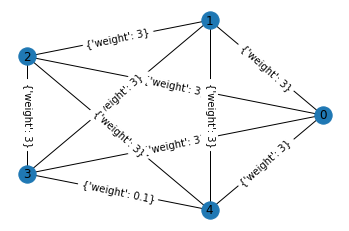

In [163]:
pos = nx.circular_layout(req_object.req_subgraph)
nx.draw_networkx_edge_labels(req_object.req_subgraph, pos)
nx.draw_circular(req_object.req_subgraph, with_labels=True)

In [164]:
req_object.match_clustering()

[[3.  4.  0.1 2. ]
 [0.  1.  3.  2. ]
 [2.  6.  3.  3. ]
 [5.  7.  3.  5. ]]
5
[[3, 4], [0], [1], [2]] [[3, 4], [0, 1], [2]]


[[3, 4], [0], [1], [2]]

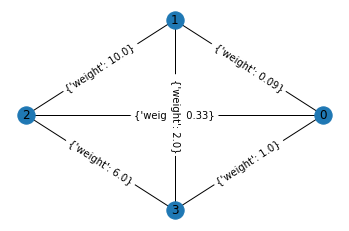

In [27]:
G2 = nx.Graph()
G2.add_node(0)
G2.add_node(1)
G2.add_node(2)
G2.add_node(3)
G2.add_edge(0,1, weight=0.09)
G2.add_edge(0,2, weight=0.33)
G2.add_edge(1,2, weight=10.0)
G2.add_edge(0,3, weight=1.0)
G2.add_edge(1,3, weight=2.0)
G2.add_edge(2,3, weight=6.0)

pos = nx.circular_layout(G2)
nx.draw_networkx_edge_labels(G2, pos)
nx.draw_circular(G2, with_labels=True)

In [29]:
dist_matrix = nx.to_numpy_matrix(G2)
dist_array = ssd.squareform(dist_matrix) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i a
linkage_ = scipy.cluster.hierarchy.linkage(dist_array, method='single', metric='euclidean')

In [31]:
from paris.utils import select_clustering

In [33]:
select_clustering(linkage_, 2)

[[2, 0, 1], [3]]

In [30]:
linkage_

array([[0.  , 1.  , 0.09, 2.  ],
       [2.  , 4.  , 0.33, 3.  ],
       [3.  , 5.  , 1.  , 4.  ]])

In [28]:
select_clustering(paris.paris(G2), 1)

[[3, 0], [1], [2]]

In [107]:
G.number_of_nodes()

4

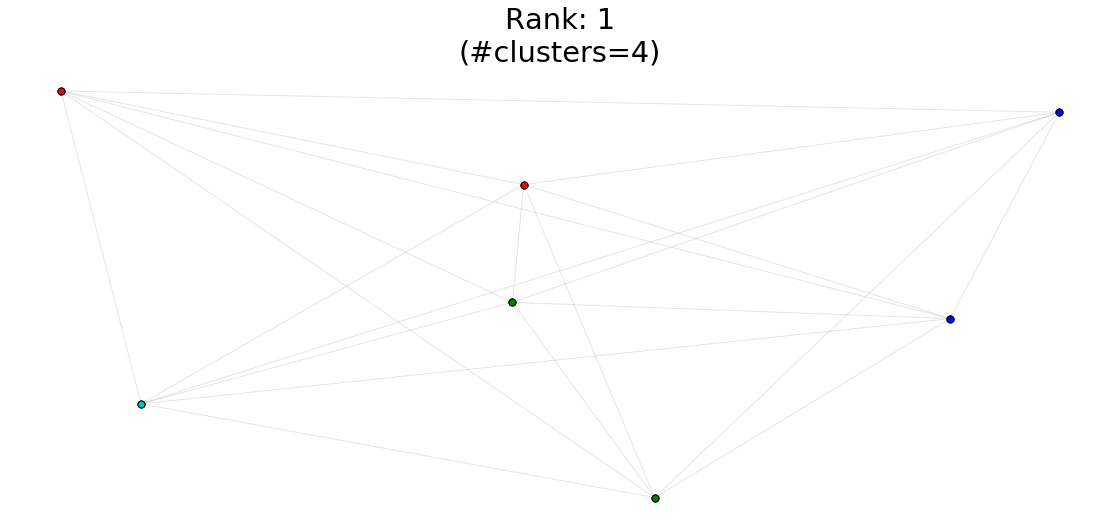

In [86]:
pos = nx.spring_layout(G)
plot_best_clusterings(G, D, 1, pos)

## Misc Testing

In [102]:
summit='_4663af6e-6265-438d-87b8-74e1550518bf__65_6314a138-53b9-42a5-b488-9c23967ed889'
enclosure='_18_0_6_f1d0357_1490143302007_461579_179266'
mirror='_18_5_2_e64033a_1509475358071_810923_58742'
aps_user='_17_0_2_3_41e01aa_1389730769202_855584_72742'
aps_mission='_17_0_2_3_41e01aa_1389728637481_651557_61606'

In [165]:
g = neptune.graphTraversal()
g.V('_18_5_3_e64033a_1517517345905_946202_22722').repeat(both().simplePath()).until(hasId('_4663af6e-6265-438d-87b8-74e1550518bf__10_a7ad0d07-fa64-40e7-a266-db3006b20dc5').or_().loops().is_(8)).path().limit(1).toList()

gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


KeyboardInterrupt: 

In [119]:
g = neptune.graphTraversal()
g.V(enclosure).valueMap().toList()

gremlin: ws://ec2-18-224-170-154.us-east-2.compute.amazonaws.com:8182/gremlin


[{'_label': ['Enclosure']}]

In [57]:
import spacy

nlp_np = spacy.load("en_core_web_sm")
merge_nps = nlp_np.create_pipe("merge_noun_chunks")
nlp_np.add_pipe(merge_nps)


In [69]:
for t in nlp_np("Hello my name is the beautiful car of New York. Bye!"):
    print(t.text, t.pos_, t.idx)

Hello INTJ 0
my name NOUN 6
is AUX 14
the beautiful car NOUN 17
of ADP 35
New York PROPN 38
. PUNCT 46
Bye INTJ 48
! PUNCT 51
